In [16]:
import torch
alpha=0.5
t1=torch.Tensor([[[0],[0],[1],[1]],[[1],[0],[0],[0]],[[0],[1],[1],[0]],[[0],[0],[0],[1]]])
w=torch.Tensor([[0.2,0.4,0.6,0.8],[0.9,0.7,0.5,0.3]])
def updateweights(a,b):
    w=[]
    for i in range(len(a)):
        w.append(a[i]+alpha*(b[i]-a[i]))
    print("updated weights clusters is ",w)
    w1 = torch.tensor(w)
    return w1
for f in range(5):
    for i in t1:
        d=[]
        for j in i:
            sum=0
            for (x,y) in zip(i,j):
                a=x-y
                b=a**2
                sum+=b
            d.append(sum)
        if(d[0]>d[1]):
            print("cluster 2 weight updates")
            w[1]=updateweights(w[1],i)
        else:
            print("cluster 1 weight updates")
            print(w[0])
            w[0]=updateweights(w[0],i)
    alpha=alpha/2
print("final updated weights ",w)

        

cluster 1 weight updates
tensor([0.2000, 0.4000, 0.6000, 0.8000])
updated weights clusters is  [tensor([0.1000]), tensor([0.2000]), tensor([0.8000]), tensor([0.9000])]
cluster 1 weight updates
tensor([0.1000, 0.2000, 0.8000, 0.9000])
updated weights clusters is  [tensor([0.5500]), tensor([0.1000]), tensor([0.4000]), tensor([0.4500])]
cluster 1 weight updates
tensor([0.5500, 0.1000, 0.4000, 0.4500])
updated weights clusters is  [tensor([0.2750]), tensor([0.5500]), tensor([0.7000]), tensor([0.2250])]
cluster 1 weight updates
tensor([0.2750, 0.5500, 0.7000, 0.2250])
updated weights clusters is  [tensor([0.1375]), tensor([0.2750]), tensor([0.3500]), tensor([0.6125])]
cluster 1 weight updates
tensor([0.1375, 0.2750, 0.3500, 0.6125])
updated weights clusters is  [tensor([0.1031]), tensor([0.2063]), tensor([0.5125]), tensor([0.7094])]
cluster 1 weight updates
tensor([0.1031, 0.2063, 0.5125, 0.7094])
updated weights clusters is  [tensor([0.3273]), tensor([0.1547]), tensor([0.3844]), tensor([0.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader,random_split

In [3]:
class KSOM(nn.Module):
    def __init__(self, input_size, output_size, sigma=1.0):
        super(KSOM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.sigma = sigma
        self.weights = nn.Parameter(torch.randn(output_size, input_size) * 0.01)

    def forward(self, x):
        dist_to_winner = torch.cdist(x, self.weights) 
        neighbors = torch.exp(-dist_to_winner / (2 * self.sigma ** 2))
        return neighbors


In [4]:
def classify(input_data, som):
    neighbors = som(input_data)
    _, indices = torch.max(neighbors, dim=1)
    return indices

In [5]:
class CustomDataset(Dataset):
    def __init__(self,root_dir,transform=None):
        self.root_dir=root_dir
        self.transform=transform
        self.file_paths=[]
        self.class_names=sorted(os.listdir(root_dir))

        for class_name in self.class_names:
            class_path=os.path.join(self.root_dir,class_name)
            files=[os.path.join(class_path, file) for file in os.listdir(class_path)]
            self.file_paths.extend(files)

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self,idx):
        img_path=self.file_paths[idx]
        image=Image.open(img_path)

        if self.transform:
            image=self.transform(image)

        class_name=os.path.basename(os.path.dirname(img_path))
        label_idx=torch.tensor(self.class_names.index(class_name),dtype=torch.long)

        return image,label_idx,class_name

In [9]:
import os
transform=transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])
dataset=CustomDataset(root_dir=r"D:\documents\datasets\plants\Bell Pepper\Train",transform=transform)
train_size=int(0.8*len(dataset))
test_size=len(dataset)-train_size
train_dataset,test_dataset=random_split(dataset,[train_size,test_size])
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
batch_size = 100
input_size=3*256*256
output_size=2
sigma=1
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)

In [10]:
som = KSOM(input_size, output_size, sigma)
epochs = 10
lr = 0.1 
losses=[]
losses1=[]
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(som.parameters(), lr=lr)
for epoch in range(epochs):
    running_loss = 0.0
    for images,labels, label in train_loader:
        images = images.view(-1,3*256*256 )  
        optimizer.zero_grad()
        outputs = som(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
    losses.append(running_loss/len(train_loader))
for epoch in range(epochs):
    running_loss = 0.0
    with torch.no_grad():
        for images, labels,label in test_loader:
            images = images.view(-1, 3*256*256 )  
            outputs = som(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(test_loader)}")
        losses1.append(running_loss/len(test_loader))


Epoch 1, Loss: 0.6931473016738892
Epoch 2, Loss: 0.6931473016738892
Epoch 3, Loss: 0.6931473016738892
Epoch 4, Loss: 0.6931473016738892
Epoch 5, Loss: 0.6931473016738892
Epoch 6, Loss: 0.6931473016738892
Epoch 7, Loss: 0.6931473016738892
Epoch 8, Loss: 0.6931473016738892
Epoch 9, Loss: 0.6931473016738892
Epoch 10, Loss: 0.6931473016738892
Epoch 1, Loss: 0.6931472992897034
Epoch 2, Loss: 0.6931472992897034
Epoch 3, Loss: 0.6931472992897034
Epoch 4, Loss: 0.6931472992897034
Epoch 5, Loss: 0.6931472992897034
Epoch 6, Loss: 0.6931472992897034
Epoch 7, Loss: 0.6931472992897034
Epoch 8, Loss: 0.6931472992897034
Epoch 9, Loss: 0.6931472992897034
Epoch 10, Loss: 0.6931472992897034


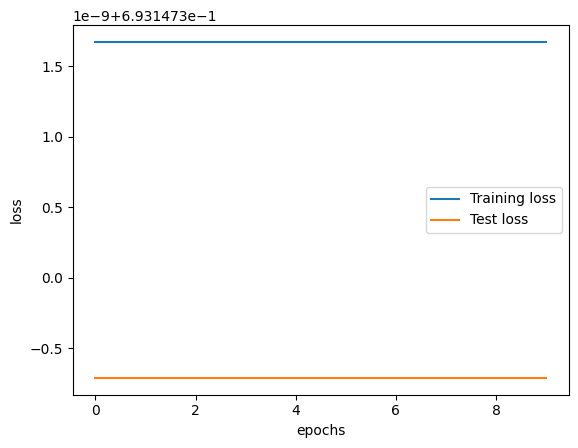

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses,label="Training loss")
plt.plot(losses1,label="Test loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()